# Imports, setting up device and seeds

In [10]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
 
## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

import torch.optim as optim

from torch.utils.data import DataLoader, random_split

In [11]:
import os
import random

def set_all_seeds(seed):
    os.environ["PL_GLOBAL_SEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_all_seeds(42)

In [12]:
# torch.cuda.set_device(1)
device = torch.device("cuda")
# device = torch.device('mps')
# device = torch.device('cpu')

# Constants

In [13]:
VALIDATION_PERCENTAGE = 0.10
TRAIN_PATH = "/kaggle/input/traffic/trafic_32"

# Loading data

In [14]:
%%time
transform = transforms.Compose([transforms.ToTensor()])

batch_size = 256

trainFolder = torchvision.datasets.ImageFolder(root=TRAIN_PATH,
                                               transform=transform)

n_val = int(np.floor(VALIDATION_PERCENTAGE * len(trainFolder)))
n_train = len(trainFolder) - n_val

train_ds, val_ds = random_split(trainFolder, [n_train, n_val])

trainloader = DataLoader(train_ds, batch_size=batch_size, drop_last=True,
                                          shuffle=True, num_workers=2)
validloader = DataLoader(val_ds , batch_size=batch_size, drop_last=True,
                                          shuffle=True, num_workers=2)

CPU times: user 1.79 s, sys: 3.37 s, total: 5.17 s
Wall time: 2min 44s


In [15]:
# takes images from valid dataset
def get_train_images(num):
    return torch.stack([val_ds[i][0] for i in range(10,10+num)], dim=0)

In [16]:
trainFolder

Dataset ImageFolder
    Number of datapoints: 39209
    Root location: /kaggle/input/traffic/trafic_32
    StandardTransform
Transform: Compose(
               ToTensor()
           )

# Model

In [17]:
class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Discriminator, self).__init__()

        self.fc_1 = nn.Linear(input_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_out  = nn.Linear(hidden_dim, 1)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.LeakyReLU(self.fc_1(x))
        x = self.LeakyReLU(self.fc_2(x))
        x = self.fc_out(x)
        return x

In [25]:
class Generator(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Generator, self).__init__()
        self.fc_1 = nn.Linear(latent_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_3 = nn.Linear(hidden_dim, output_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
    def forward(self, x):
        h     = self.LeakyReLU(self.fc_1(x))
        h     = self.LeakyReLU(self.fc_2(h))
        
        x_hat = torch.sigmoid(self.fc_3(h))
        x_hat = x_hat.view([-1, 3, 32, 32])
        return x_hat

In [26]:
# Models
latent_dim = 32
generator = Generator(latent_dim=latent_dim, hidden_dim=256, output_dim=3*32*32).to(device)
discriminator = Discriminator( hidden_dim=256, input_dim=3*32*32).to(device)

# Optimizers
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)
generator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=generator_optimizer, gamma=0.99)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
discriminator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=discriminator_optimizer, gamma=0.99)

# loss
criterion = nn.MSELoss()

In [27]:
fixed_noise = torch.randn(16, latent_dim,device=device)

# Training loop

Epoch: 0, discrimiantor fake error: 0.208, discriminator real acc: 0.562


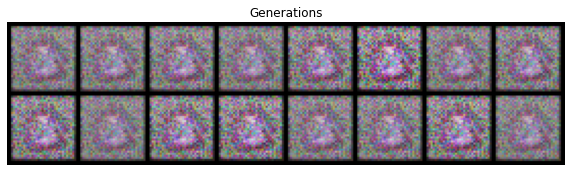

Epoch: 1, discrimiantor fake error: 0.113, discriminator real acc: 0.728
Epoch: 2, discrimiantor fake error: 0.0754, discriminator real acc: 0.833
Epoch: 3, discrimiantor fake error: 0.0625, discriminator real acc: 0.851
Epoch: 4, discrimiantor fake error: 0.0423, discriminator real acc: 0.897
Epoch: 5, discrimiantor fake error: 0.0275, discriminator real acc: 0.937
Epoch: 6, discrimiantor fake error: 0.028, discriminator real acc: 0.952
Epoch: 7, discrimiantor fake error: 0.0294, discriminator real acc: 0.959
Epoch: 8, discrimiantor fake error: 0.0256, discriminator real acc: 0.969
Epoch: 9, discrimiantor fake error: 0.0304, discriminator real acc: 0.965
Epoch: 10, discrimiantor fake error: 0.0401, discriminator real acc: 0.956


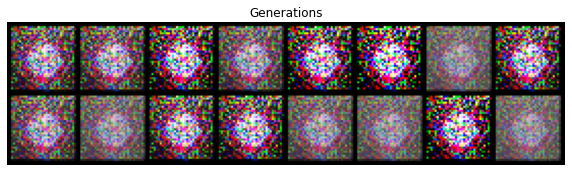

Epoch: 11, discrimiantor fake error: 0.0431, discriminator real acc: 0.953
Epoch: 12, discrimiantor fake error: 0.0476, discriminator real acc: 0.952
Epoch: 13, discrimiantor fake error: 0.0515, discriminator real acc: 0.948
Epoch: 14, discrimiantor fake error: 0.0549, discriminator real acc: 0.943
Epoch: 15, discrimiantor fake error: 0.0565, discriminator real acc: 0.943
Epoch: 16, discrimiantor fake error: 0.0432, discriminator real acc: 0.956
Epoch: 17, discrimiantor fake error: 0.0346, discriminator real acc: 0.958
Epoch: 18, discrimiantor fake error: 0.0396, discriminator real acc: 0.953
Epoch: 19, discrimiantor fake error: 0.047, discriminator real acc: 0.949
Epoch: 20, discrimiantor fake error: 0.0567, discriminator real acc: 0.944


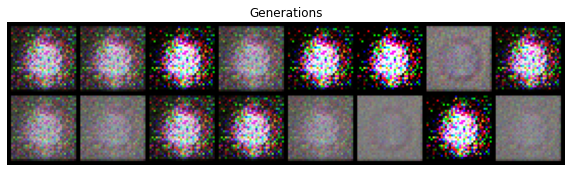

Epoch: 21, discrimiantor fake error: 0.0659, discriminator real acc: 0.935
Epoch: 22, discrimiantor fake error: 0.06, discriminator real acc: 0.944
Epoch: 23, discrimiantor fake error: 0.0634, discriminator real acc: 0.941
Epoch: 24, discrimiantor fake error: 0.0549, discriminator real acc: 0.945
Epoch: 25, discrimiantor fake error: 0.0551, discriminator real acc: 0.942
Epoch: 26, discrimiantor fake error: 0.0602, discriminator real acc: 0.937
Epoch: 27, discrimiantor fake error: 0.0642, discriminator real acc: 0.935
Epoch: 28, discrimiantor fake error: 0.0649, discriminator real acc: 0.936
Epoch: 29, discrimiantor fake error: 0.0691, discriminator real acc: 0.936
Epoch: 30, discrimiantor fake error: 0.0662, discriminator real acc: 0.935


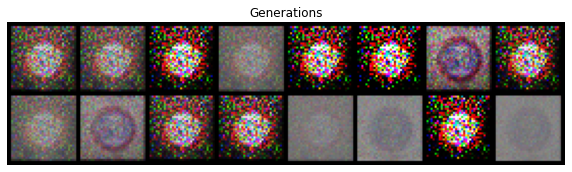

Epoch: 31, discrimiantor fake error: 0.0692, discriminator real acc: 0.928
Epoch: 32, discrimiantor fake error: 0.073, discriminator real acc: 0.926
Epoch: 33, discrimiantor fake error: 0.0846, discriminator real acc: 0.92
Epoch: 34, discrimiantor fake error: 0.0678, discriminator real acc: 0.936
Epoch: 35, discrimiantor fake error: 0.0744, discriminator real acc: 0.926
Epoch: 36, discrimiantor fake error: 0.0596, discriminator real acc: 0.935
Epoch: 37, discrimiantor fake error: 0.0838, discriminator real acc: 0.919
Epoch: 38, discrimiantor fake error: 0.0746, discriminator real acc: 0.932
Epoch: 39, discrimiantor fake error: 0.0825, discriminator real acc: 0.922
Epoch: 40, discrimiantor fake error: 0.0906, discriminator real acc: 0.912


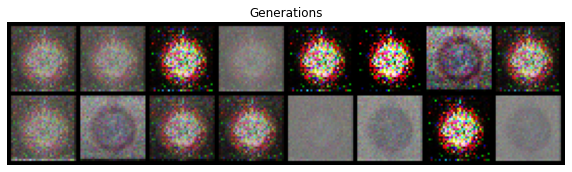

Epoch: 41, discrimiantor fake error: 0.102, discriminator real acc: 0.897
Epoch: 42, discrimiantor fake error: 0.103, discriminator real acc: 0.897
Epoch: 43, discrimiantor fake error: 0.096, discriminator real acc: 0.901
Epoch: 44, discrimiantor fake error: 0.0975, discriminator real acc: 0.904
Epoch: 45, discrimiantor fake error: 0.0886, discriminator real acc: 0.912
Epoch: 46, discrimiantor fake error: 0.103, discriminator real acc: 0.891
Epoch: 47, discrimiantor fake error: 0.0997, discriminator real acc: 0.898
Epoch: 48, discrimiantor fake error: 0.103, discriminator real acc: 0.902
Epoch: 49, discrimiantor fake error: 0.12, discriminator real acc: 0.889
Epoch: 50, discrimiantor fake error: 0.123, discriminator real acc: 0.874


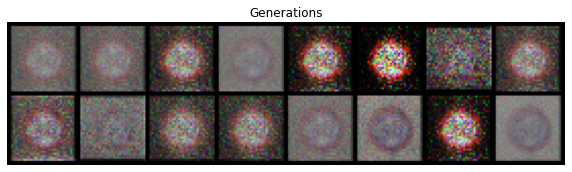

Epoch: 51, discrimiantor fake error: 0.119, discriminator real acc: 0.882
Epoch: 52, discrimiantor fake error: 0.122, discriminator real acc: 0.883
Epoch: 53, discrimiantor fake error: 0.111, discriminator real acc: 0.894
Epoch: 54, discrimiantor fake error: 0.102, discriminator real acc: 0.903
Epoch: 55, discrimiantor fake error: 0.108, discriminator real acc: 0.889
Epoch: 56, discrimiantor fake error: 0.115, discriminator real acc: 0.892
Epoch: 57, discrimiantor fake error: 0.129, discriminator real acc: 0.883
Epoch: 58, discrimiantor fake error: 0.131, discriminator real acc: 0.873
Epoch: 59, discrimiantor fake error: 0.141, discriminator real acc: 0.859
Epoch: 60, discrimiantor fake error: 0.137, discriminator real acc: 0.862


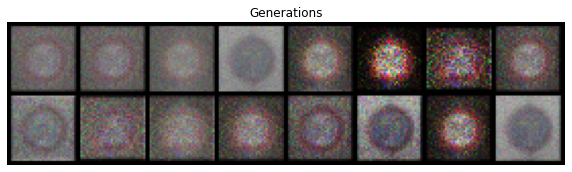

Epoch: 61, discrimiantor fake error: 0.139, discriminator real acc: 0.865
Epoch: 62, discrimiantor fake error: 0.13, discriminator real acc: 0.879
Epoch: 63, discrimiantor fake error: 0.137, discriminator real acc: 0.868
Epoch: 64, discrimiantor fake error: 0.146, discriminator real acc: 0.862
Epoch: 65, discrimiantor fake error: 0.119, discriminator real acc: 0.885
Epoch: 66, discrimiantor fake error: 0.129, discriminator real acc: 0.882
Epoch: 67, discrimiantor fake error: 0.134, discriminator real acc: 0.876
Epoch: 68, discrimiantor fake error: 0.129, discriminator real acc: 0.886
Epoch: 69, discrimiantor fake error: 0.144, discriminator real acc: 0.87
Epoch: 70, discrimiantor fake error: 0.13, discriminator real acc: 0.875


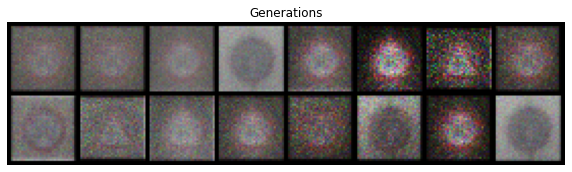

Epoch: 71, discrimiantor fake error: 0.146, discriminator real acc: 0.867
Epoch: 72, discrimiantor fake error: 0.144, discriminator real acc: 0.869
Epoch: 73, discrimiantor fake error: 0.141, discriminator real acc: 0.87
Epoch: 74, discrimiantor fake error: 0.127, discriminator real acc: 0.874
Epoch: 75, discrimiantor fake error: 0.129, discriminator real acc: 0.875
Epoch: 76, discrimiantor fake error: 0.128, discriminator real acc: 0.882
Epoch: 77, discrimiantor fake error: 0.132, discriminator real acc: 0.869
Epoch: 78, discrimiantor fake error: 0.123, discriminator real acc: 0.88
Epoch: 79, discrimiantor fake error: 0.126, discriminator real acc: 0.876
Epoch: 80, discrimiantor fake error: 0.127, discriminator real acc: 0.882


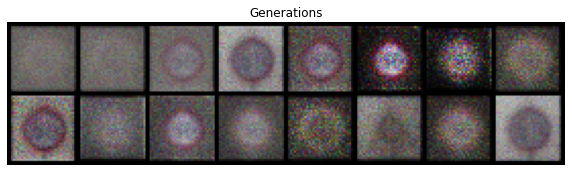

Epoch: 81, discrimiantor fake error: 0.121, discriminator real acc: 0.884
Epoch: 82, discrimiantor fake error: 0.125, discriminator real acc: 0.882
Epoch: 83, discrimiantor fake error: 0.13, discriminator real acc: 0.881
Epoch: 84, discrimiantor fake error: 0.144, discriminator real acc: 0.863
Epoch: 85, discrimiantor fake error: 0.132, discriminator real acc: 0.875
Epoch: 86, discrimiantor fake error: 0.136, discriminator real acc: 0.87
Epoch: 87, discrimiantor fake error: 0.131, discriminator real acc: 0.872
Epoch: 88, discrimiantor fake error: 0.128, discriminator real acc: 0.872
Epoch: 89, discrimiantor fake error: 0.123, discriminator real acc: 0.88
Epoch: 90, discrimiantor fake error: 0.127, discriminator real acc: 0.874


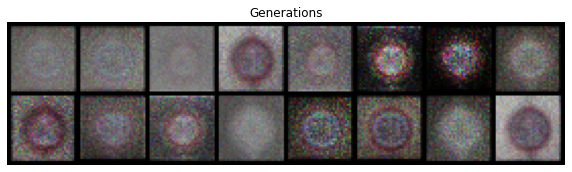

Epoch: 91, discrimiantor fake error: 0.124, discriminator real acc: 0.879
Epoch: 92, discrimiantor fake error: 0.127, discriminator real acc: 0.88
Epoch: 93, discrimiantor fake error: 0.124, discriminator real acc: 0.88
Epoch: 94, discrimiantor fake error: 0.121, discriminator real acc: 0.885
Epoch: 95, discrimiantor fake error: 0.127, discriminator real acc: 0.883
Epoch: 96, discrimiantor fake error: 0.124, discriminator real acc: 0.889
Epoch: 97, discrimiantor fake error: 0.13, discriminator real acc: 0.879
Epoch: 98, discrimiantor fake error: 0.124, discriminator real acc: 0.874
Epoch: 99, discrimiantor fake error: 0.119, discriminator real acc: 0.881
CPU times: user 2min 24s, sys: 32.2 s, total: 2min 56s
Wall time: 43min 13s


In [28]:
%%time
G_losses = []
D_losses = []
num_epochs = 100
for epoch in range(num_epochs):
    # For each batch in the dataloader
    discriminator_fake_acc = []
    discriminator_real_acc = []
    for i, data in enumerate(trainloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        discriminator_optimizer.zero_grad()
        # Format batch
        real_images = data[0].to(device)
        b_size = real_images.size(0)
        label = torch.ones((b_size,), dtype=torch.float, device=device) # Setting labels for real images
        # Forward pass real batch through D
        output = discriminator(real_images).view(-1)
        # Calculate loss on all-real batch
        error_discriminator_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        error_discriminator_real.backward()
        discriminator_real_acc.append(output.mean().item())

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, latent_dim,device=device)
        # Generate fake image batch with Generator
        fake_images = generator(noise)
        label_fake = torch.zeros((b_size,), dtype=torch.float, device=device)
        # Classify all fake batch with Discriminator
        output = discriminator(fake_images.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        error_discriminator_fake = criterion(output, label_fake)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        error_discriminator_fake.backward()
        discriminator_fake_acc.append(output.mean().item())
        # Compute error of D as sum over the fake and the real batches
        error_discriminator = error_discriminator_real + error_discriminator_fake
        # Update D
        discriminator_optimizer.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        generator_optimizer.zero_grad()
        label = torch.ones((b_size,), dtype=torch.float, device=device)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = discriminator(fake_images).view(-1)
        # Calculate G's loss based on this output
        error_generator = criterion(output, label)
        # Calculate gradients for G
        error_generator.backward()
        D_G_z2 = output.mean().item()
        # Update G
        generator_optimizer.step()

        # Output training stats
        # Save Losses for plotting later
        G_losses.append(error_generator.item())
        D_losses.append(error_discriminator.item())

    print(f"Epoch: {epoch}, discrimiantor fake error: {np.mean(discriminator_fake_acc):.3}, discriminator real acc: {np.mean(discriminator_real_acc):.3}")
    generator_scheduler.step()
    discriminator_scheduler.step()
    if epoch % 10 == 0:
        with torch.no_grad():
            fake = generator(fixed_noise).detach().cpu()
        grid = torchvision.utils.make_grid(fake)
        grid = grid.permute(1, 2, 0)
        plt.figure(figsize=(10,10))
        plt.title(f"Generations")
        plt.imshow(grid)
        plt.axis('off')
        plt.show()

In [ ]:
#saving models
torch.save(generator.state_dict(), "generator.zip")
torch.save(discriminator.state_dict(), "discriminator.zip")

# Reconstructions

In [22]:
def visualize_reconstructions(model, input_imgs, device):
    # Reconstruct images
    model.eval()
    with torch.no_grad():
        reconst_imgs, means, log_var = model(input_imgs.to(device))
    reconst_imgs = reconst_imgs.cpu()
    
    # Plotting
    imgs = torch.stack([input_imgs, reconst_imgs], dim=1).flatten(0,1)
    grid = torchvision.utils.make_grid(imgs, nrow=4, normalize=False, range=(-1,1))
    grid = grid.permute(1, 2, 0)
    if len(input_imgs) == 4:
        plt.figure(figsize=(10,10))
    else:
        plt.figure(figsize=(15,10))
    plt.title(f"Reconstructions")
    plt.imshow(grid)
    plt.axis('off')
    plt.show()

In [23]:
input_imgs = get_train_images(8)
visualize_reconstructions(vae, input_imgs, device)

NameError: name 'vae' is not defined

# Generating new images

In [ ]:
def generate_images(model, n_imgs, device):
    # Generate images
    model.eval()
    with torch.no_grad():
        generated_imgs = model.decoder(torch.randn([n_imgs, model.latent_dim]).to(device))
    generated_imgs = generated_imgs.cpu()
    
    grid = torchvision.utils.make_grid(generated_imgs, nrow=4, normalize=False, range=(-1,1))
    grid = grid.permute(1, 2, 0)
    if len(input_imgs) == 4:
        plt.figure(figsize=(10,10))
    else:
        plt.figure(figsize=(15,10))
    plt.title(f"Generations")
    plt.imshow(grid)
    plt.axis('off')
    plt.show()

In [ ]:
generate_images(vae, 16 , device)

# Hidden layer VAE

In [ ]:
def embed_imgs(model, data_loader):
    # Encode all images in the data_laoder using model, and return both images and encodings
    img_list, embed_list = [], []
    model.eval()
    labels = []
    for imgs, label in data_loader:
        with torch.no_grad():
            mean, var_log = model.encoder(imgs.to(device))
        img_list.append(imgs)
        embed_list.append(mean)
        labels.append(label)
    return (torch.cat(img_list, dim=0), torch.cat(embed_list, dim=0), torch.cat(labels, dim=0))


In [ ]:
import umap
import pandas as pd
import seaborn as sns
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [ ]:
umap_object = umap.UMAP(metric="cosine", n_neighbors=100)
train_img_embeds = embed_imgs(vae, trainloader)
test_img_embeds = embed_imgs(vae, validloader)
train_embedded = umap_object.fit_transform(train_img_embeds[1][:5000].cpu())

In [ ]:
def plot_latent(train_embedded, train_img_embeds, n_data=5000):
    data = pd.DataFrame(train_embedded[:n_data])
    data["label"] = train_img_embeds[2][:n_data].cpu().numpy()
    examples = []
    examples_locations = []
    for i in np.random.randint(0,n_data,40):
        examples.append(train_img_embeds[0][i].squeeze(0).cpu().numpy())
        examples_locations.append(data.iloc[i])
    fig, ax = plt.subplots(figsize=(12, 10))
    # ax.scatter(noises_to_plot_tsne[0],noises_to_plot_tsne[1],c=noises_to_plot_tsne["batch"],s=3,alpha=0.8)
    sns.scatterplot(
        x=0, y=1,
        hue="label",
        palette=sns.color_palette("hls", 43),
        data=data,
        legend="full",
        alpha=0.1
    )
    for location, example in zip(examples_locations, examples):
        x, y = location[0], location[1]
        label = int(location["label"])
        print(example.shape)
        ab = AnnotationBbox(OffsetImage(example,cmap=plt.cm.gray_r, zoom=1), (x, y), frameon=True,
                            bboxprops=dict(facecolor=sns.color_palette("hls", 43)[label], boxstyle="round"))
        ax.add_artist(ab)
    plt.show()

In [ ]:
# plot_latent(train_embedded, train_img_embeds)

In [ ]:
data = pd.DataFrame(train_embedded[:5000])
data["label"] = train_img_embeds[2][:5000].cpu().numpy()
fig, ax = plt.subplots(figsize=(16, 13))
# ax.scatter(noises_to_plot_tsne[0],noises_to_plot_tsne[1],c=noises_to_plot_tsne["batch"],s=3,alpha=0.8)
sns.scatterplot(
    x=0, y=1,
    hue="label",
    palette=sns.color_palette("hls", 43),
    data=data,
    legend="full",
    alpha=0.9
)

# Evaluation - Frechet Inception distance

In [ ]:
import numpy as np
from scipy import linalg


def calculate_frechet_distance(distribution_1, distribution_2, eps=1e-6):
    mu1 = np.mean(distribution_1, axis=0)
    sigma1 = np.cov(distribution_1, rowvar=False)

    mu2 = np.mean(distribution_2, axis=0)
    sigma2 = np.cov(distribution_2, rowvar=False)

    """Numpy implementation of the Frechet Distance.
    The Frechet distance between two multivariate Gaussians X_1 ~ N(mu_1, C_1)
    and X_2 ~ N(mu_2, C_2) is
            d^2 = ||mu_1 - mu_2||^2 + Tr(C_1 + C_2 - 2*sqrt(C_1*C_2)).
    Stable version by Dougal J. Sutherland.
    Params:
    -- mu1   : Numpy array containing the activations of a layer of the
               inception net (like returned by the function 'get_predictions')
               for generated samples.
    -- mu2   : The sample mean over activations, precalculated on an
               representative data set.
    -- sigma1: The covariance matrix over activations for generated samples.
    -- sigma2: The covariance matrix over activations, precalculated on an
               representative data set.
    Returns:
    --   : The Frechet Distance.
    """

    mu1 = np.atleast_1d(mu1)
    mu2 = np.atleast_1d(mu2)

    sigma1 = np.atleast_2d(sigma1)
    sigma2 = np.atleast_2d(sigma2)

    assert mu1.shape == mu2.shape, \
        'Training and test mean vectors have different lengths'
    assert sigma1.shape == sigma2.shape, \
        'Training and test covariances have different dimensions'

    diff = mu1 - mu2

    # Product might be almost singular
    covmean, _ = linalg.sqrtm(sigma1.dot(sigma2), disp=False)
    if not np.isfinite(covmean).all():
        msg = ('fid calculation produces singular product; '
               'adding %s to diagonal of cov estimates') % eps
        print(msg)
        offset = np.eye(sigma1.shape[0]) * eps
        covmean = linalg.sqrtm((sigma1 + offset).dot(sigma2 + offset))

    # Numerical error might give slight imaginary component
    if np.iscomplexobj(covmean):
        if not np.allclose(np.diagonal(covmean).imag, 0, atol=1e-3):
            m = np.max(np.abs(covmean.imag))
            raise ValueError('Imaginary component {}'.format(m))
        covmean = covmean.real

    tr_covmean = np.trace(covmean)

    return (diff.dot(diff) + np.trace(sigma1) +
            np.trace(sigma2) - 2 * tr_covmean)

In [ ]:
class Evaluator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Evaluator, self).__init__()

        self.fc_1 = nn.Linear(input_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, 50)
        self.fc_out  = nn.Linear(50, 10)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
    def get_features(self, x):
        x = torch.flatten(x, 1)
        x = self.LeakyReLU(self.fc_1(x))
        x = self.LeakyReLU(self.fc_2(x))
        return x
    

    def forward(self, x):
        x = self.get_features(x)
        x = self.fc_out(x)
        return x

evaluator = Evaluator(32*32*3, 256).to(device)

In [ ]:
orig_data = [x[0] for x in list(val_ds)[:1000]]
orig_data = torch.stack(orig_data)

In [ ]:
with torch.no_grad():
    latent_dim=32
    fixed_noise = torch.randn(1000, latent_dim, device=device)
    generations_vae = vae.decoder(fixed_noise)
    
    dist_orig_data = evaluator.get_features(orig_data.to(device)).cpu()
    dist_vae = evaluator.get_features(generations_vae.to(device)).cpu()

In [ ]:
orig_data_2 = [x[0] for x in list(val_ds)[-1000:]]
orig_data_2 = torch.stack(orig_data_2)
with torch.no_grad():
    dist_orig_data_2 = evaluator.get_features(orig_data_2.to(device)).cpu()

In [ ]:
for name, obj in zip(['orig','vae'],[dist_orig_data_2.numpy(), dist_vae.numpy()]):
    print(f"FD {name}: {calculate_frechet_distance(dist_orig_data.numpy(),obj)}")

# Saving generated images to file

In [ ]:
torch.save(generations_vae.cpu().detach(), "poniedzialek_Lopatto_Sakowski.pt")
